In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data_dir = "UCI HAR Dataset/"

In [50]:
df_X = pd.read_csv(data_dir+"train/X_train.txt", header=None, delim_whitespace=True)
df_y = pd.read_csv(data_dir+"train/y_train.txt", header=None, delim_whitespace=True)
df_sub = pd.read_csv(data_dir+"train/subject_train.txt", header=None, delim_whitespace=True)
features_name = pd.read_csv(data_dir+"features.txt", header=None, delim_whitespace=True)
print (df_X.shape)
print (df_y.shape)
print (df_sub.shape)
print (features_name.shape)

(7352, 561)
(7352, 1)
(7352, 1)
(561, 2)


In [51]:
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [52]:
df_y.head()

,0
0,5
1,5
2,5
3,5
4,5


In [53]:
features_name.drop(0,1,inplace=True)


In [54]:
features = features_name.iloc[:,0].to_list() + ['Activity', 'Person']
print (features)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

In [57]:
df = pd.concat([df_X, df_y, df_sub], axis=1, ignore_index=True)
df.columns = features
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,Person
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5,1


In [58]:
# Person1 = df[df['Person'] == 1]
# Person1.describe
Activities = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4 : "SITTING", 5 : "STANDING", 6 : "LAYING"}
print (Activities)

def slice_df(data_f, activity,person=None):
    ret_df = data_f[data_f['Activity'] == activity]
    ret_df.reset_index(inplace=True,drop=True)
    if person is None:
        return ret_df
    ret_df = ret_df[ret_df['Person'] == person]
    ret_df.reset_index(inplace=True,drop=True)
    return ret_df

{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


In [59]:
walking_df = slice_df(df, 1, 1)
walking_up_df = slice_df(df, 2, 1)
walking_down_df = slice_df(df, 3, 1)
sitting_df = slice_df(df, 4, 1)
standing_df = slice_df(df, 5, 1)
laying_df = slice_df(df, 6, 1)

Text(0.5, 1.0, 'laying')

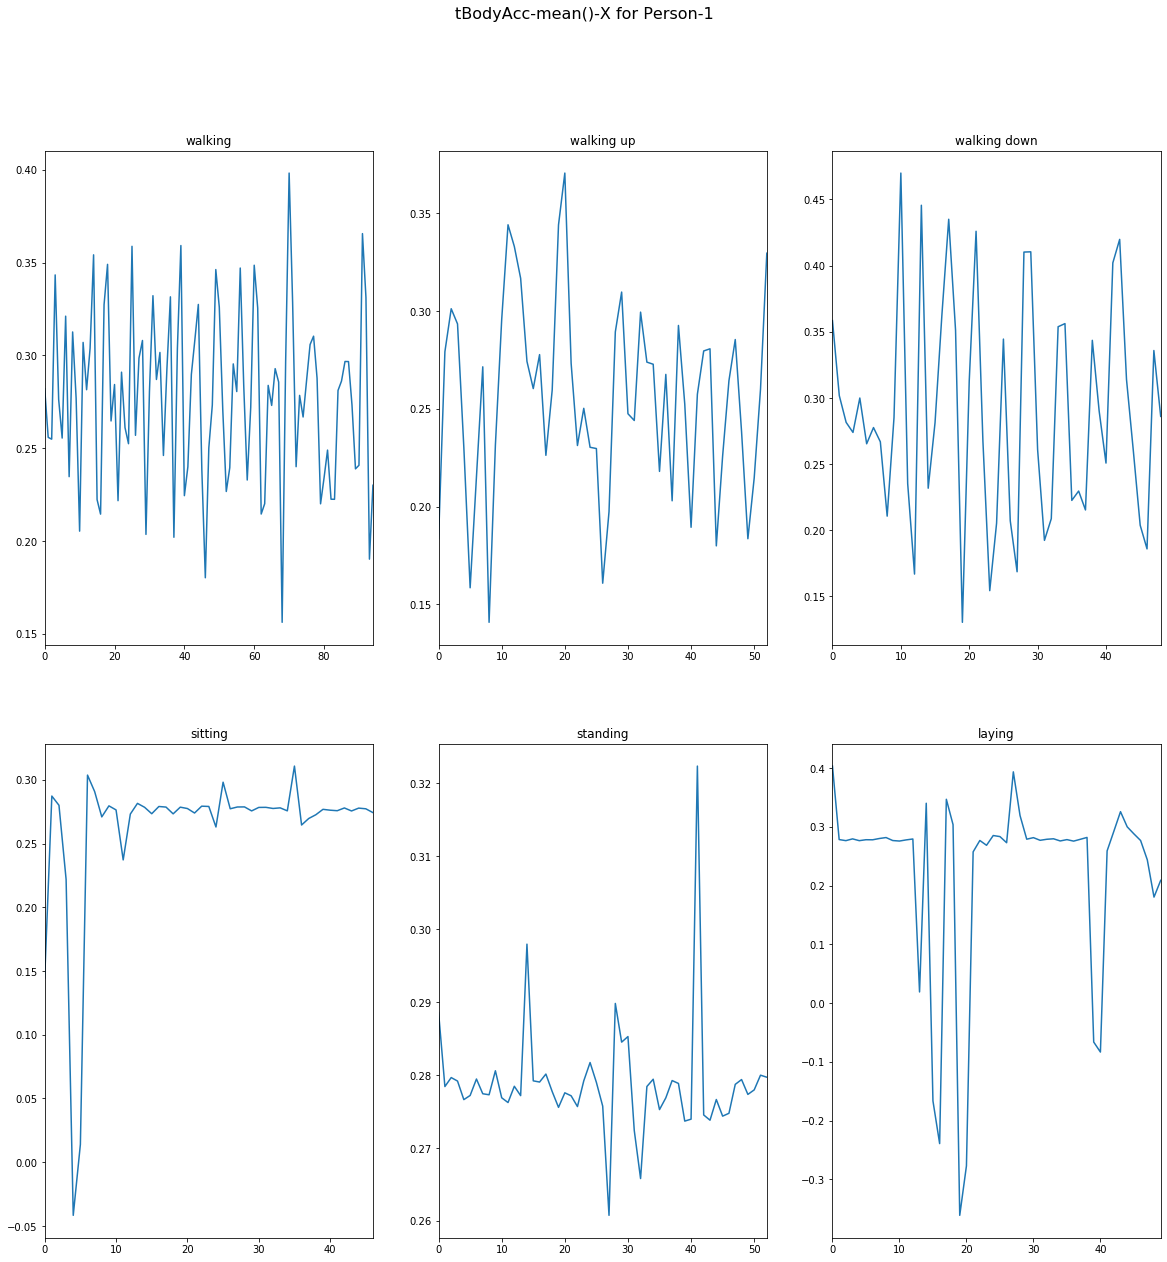

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,20))
fig.suptitle('tBodyAcc-mean()-X for Person-1', fontsize=16)
ftr = 'tBodyAcc-mean()-X'
a1 = walking_df[ftr].plot(ax=axes[0,0])
a1.set_title("walking")
a2 = walking_up_df[ftr].plot(ax=axes[0,1])
a2.set_title("walking up")
a3 = walking_down_df[ftr].plot(ax=axes[0,2])
a3.set_title("walking down")
a4 = sitting_df[ftr].plot(ax=axes[1,0])
a4.set_title("sitting")
a5 = standing_df[ftr].plot(ax=axes[1,1])
a5.set_title("standing")
a6 = laying_df[ftr].plot(ax=axes[1,2])
a6.set_title("laying")

Text(0.5, 1.0, 'laying')

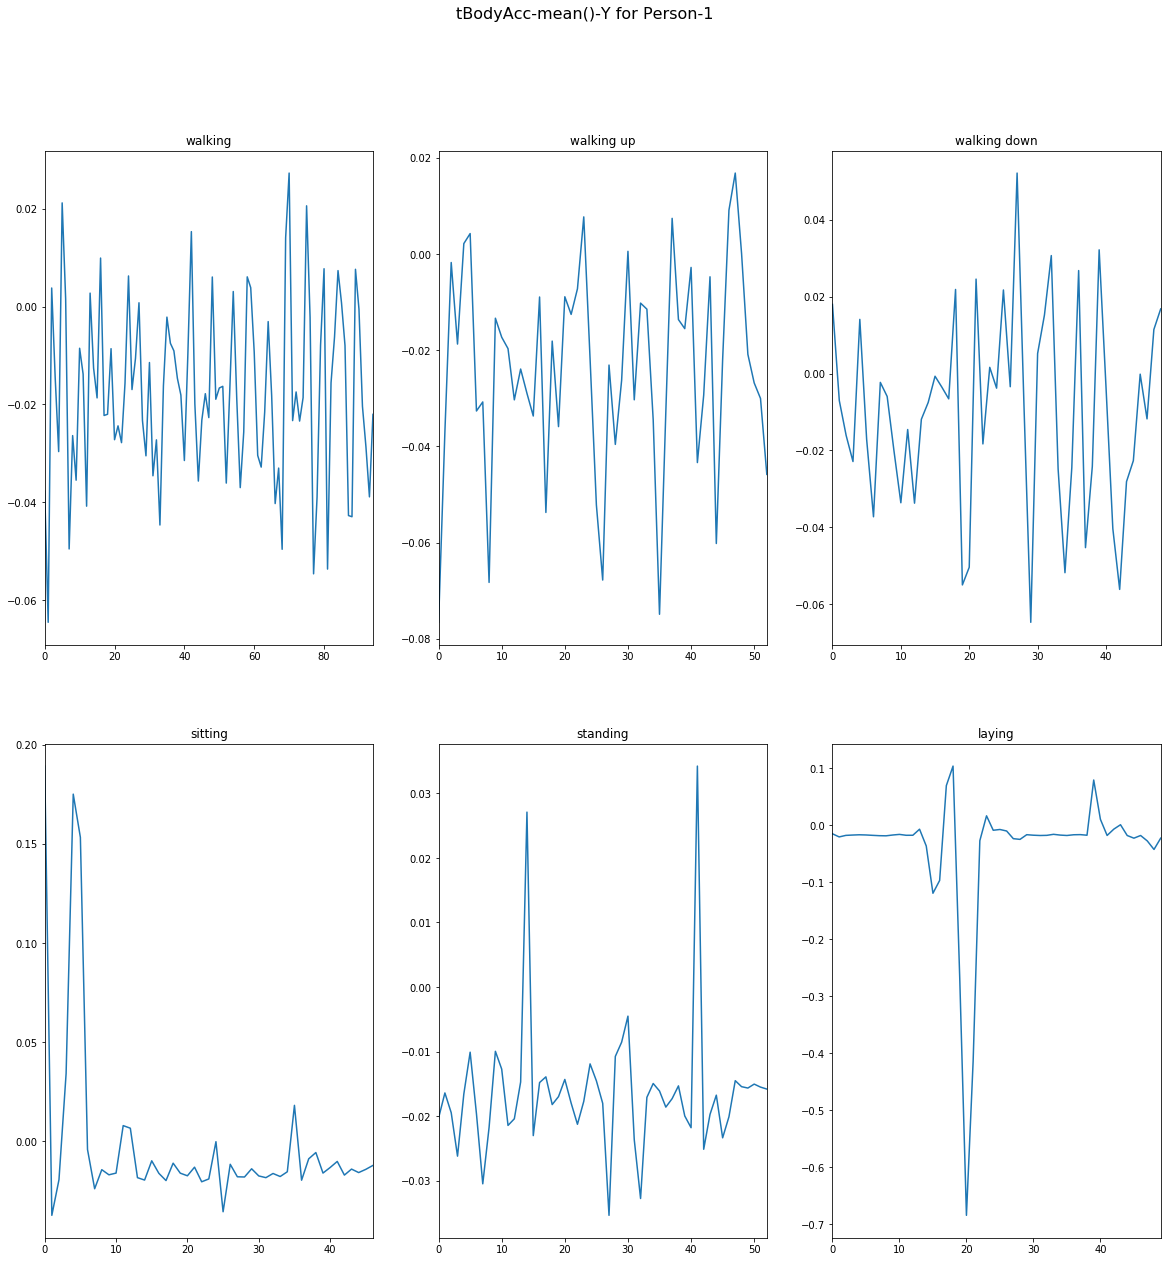

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,20))
fig.suptitle('tBodyAcc-mean()-Y for Person-1', fontsize=16)
ftr = 'tBodyAcc-mean()-Y'
a1 = walking_df[ftr].plot(ax=axes[0,0])
a1.set_title("walking")
a2 = walking_up_df[ftr].plot(ax=axes[0,1])
a2.set_title("walking up")
a3 = walking_down_df[ftr].plot(ax=axes[0,2])
a3.set_title("walking down")
a4 = sitting_df[ftr].plot(ax=axes[1,0])
a4.set_title("sitting")
a5 = standing_df[ftr].plot(ax=axes[1,1])
a5.set_title("standing")
a6 = laying_df[ftr].plot(ax=axes[1,2])
a6.set_title("laying")

Text(0.5, 1.0, 'laying')

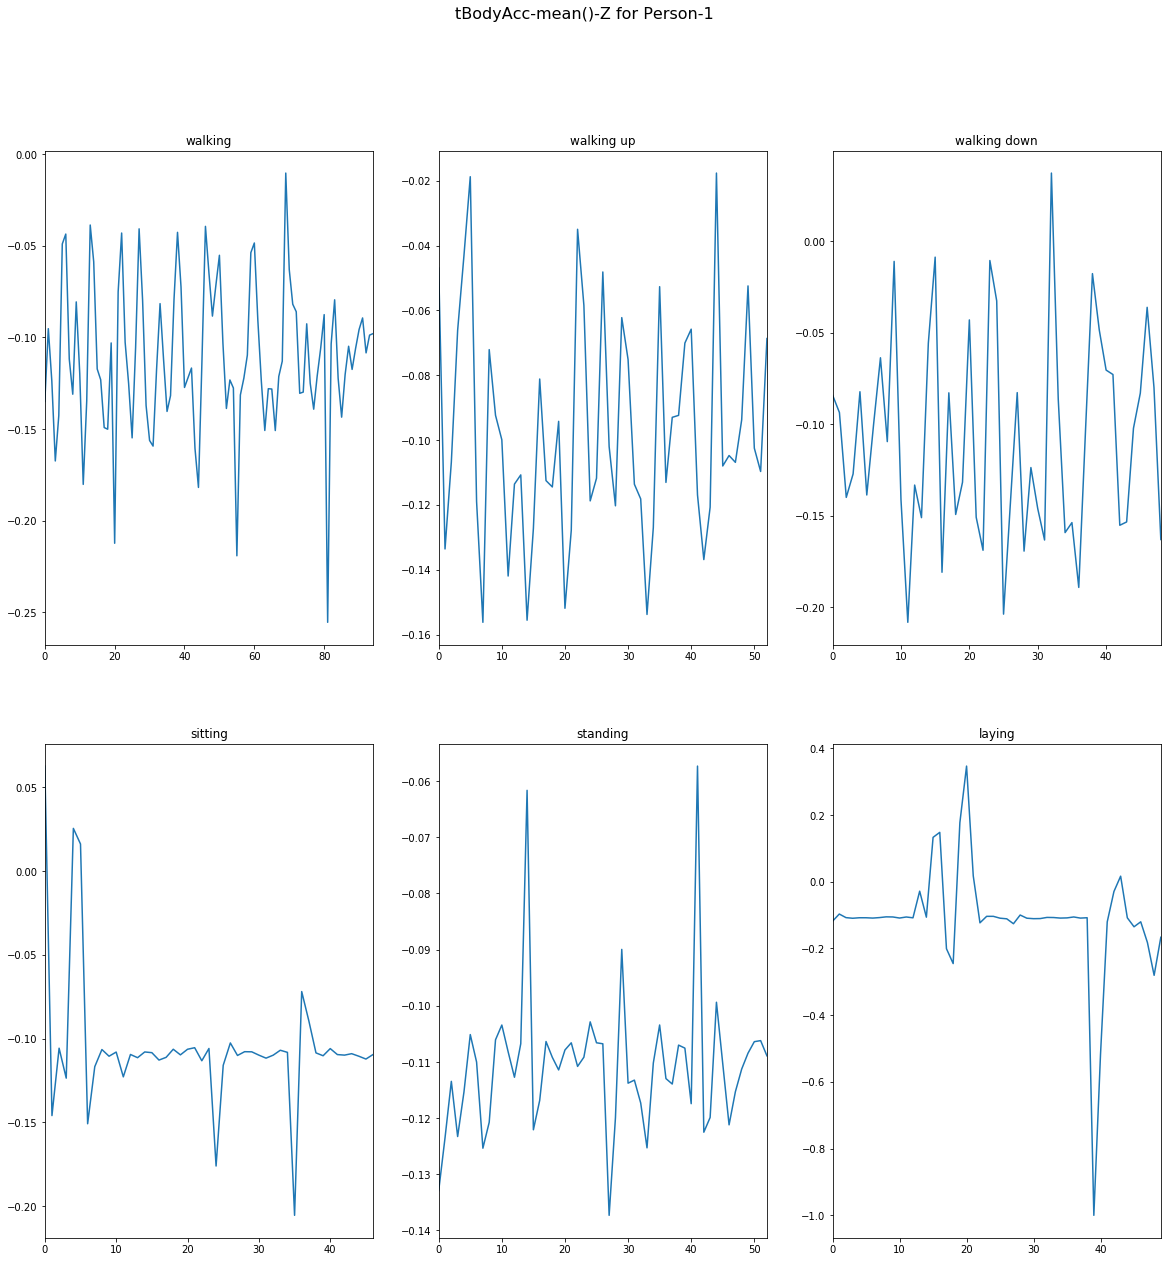

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,20))
fig.suptitle('tBodyAcc-mean()-Z for Person-1', fontsize=16)
ftr = 'tBodyAcc-mean()-Z'
a1 = walking_df[ftr].plot(ax=axes[0,0])
a1.set_title("walking")
a2 = walking_up_df[ftr].plot(ax=axes[0,1])
a2.set_title("walking up")
a3 = walking_down_df[ftr].plot(ax=axes[0,2])
a3.set_title("walking down")
a4 = sitting_df[ftr].plot(ax=axes[1,0])
a4.set_title("sitting")
a5 = standing_df[ftr].plot(ax=axes[1,1])
a5.set_title("standing")
a6 = laying_df[ftr].plot(ax=axes[1,2])
a6.set_title("laying")

Text(0.5, 1.0, 'laying')

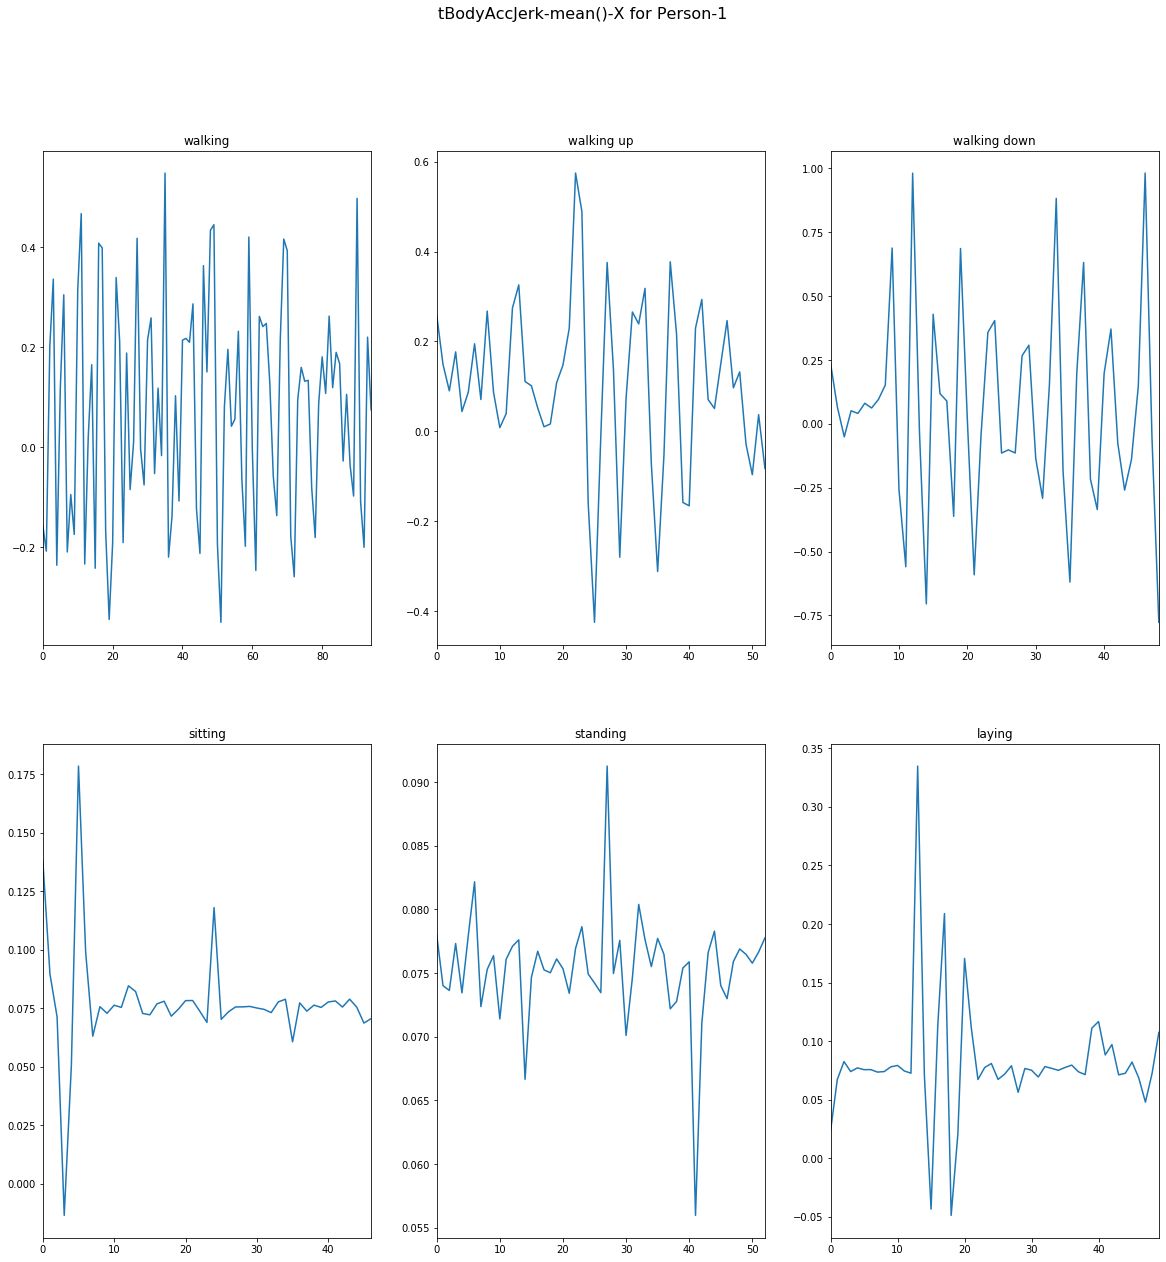

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,20))
fig.suptitle('tBodyAccJerk-mean()-X for Person-1', fontsize=16)
ftr = 'tBodyAccJerk-mean()-X'
a1 = walking_df[ftr].plot(ax=axes[0,0])
a1.set_title("walking")
a2 = walking_up_df[ftr].plot(ax=axes[0,1])
a2.set_title("walking up")
a3 = walking_down_df[ftr].plot(ax=axes[0,2])
a3.set_title("walking down")
a4 = sitting_df[ftr].plot(ax=axes[1,0])
a4.set_title("sitting")
a5 = standing_df[ftr].plot(ax=axes[1,1])
a5.set_title("standing")
a6 = laying_df[ftr].plot(ax=axes[1,2])
a6.set_title("laying")

Text(0.5, 1.0, 'laying')

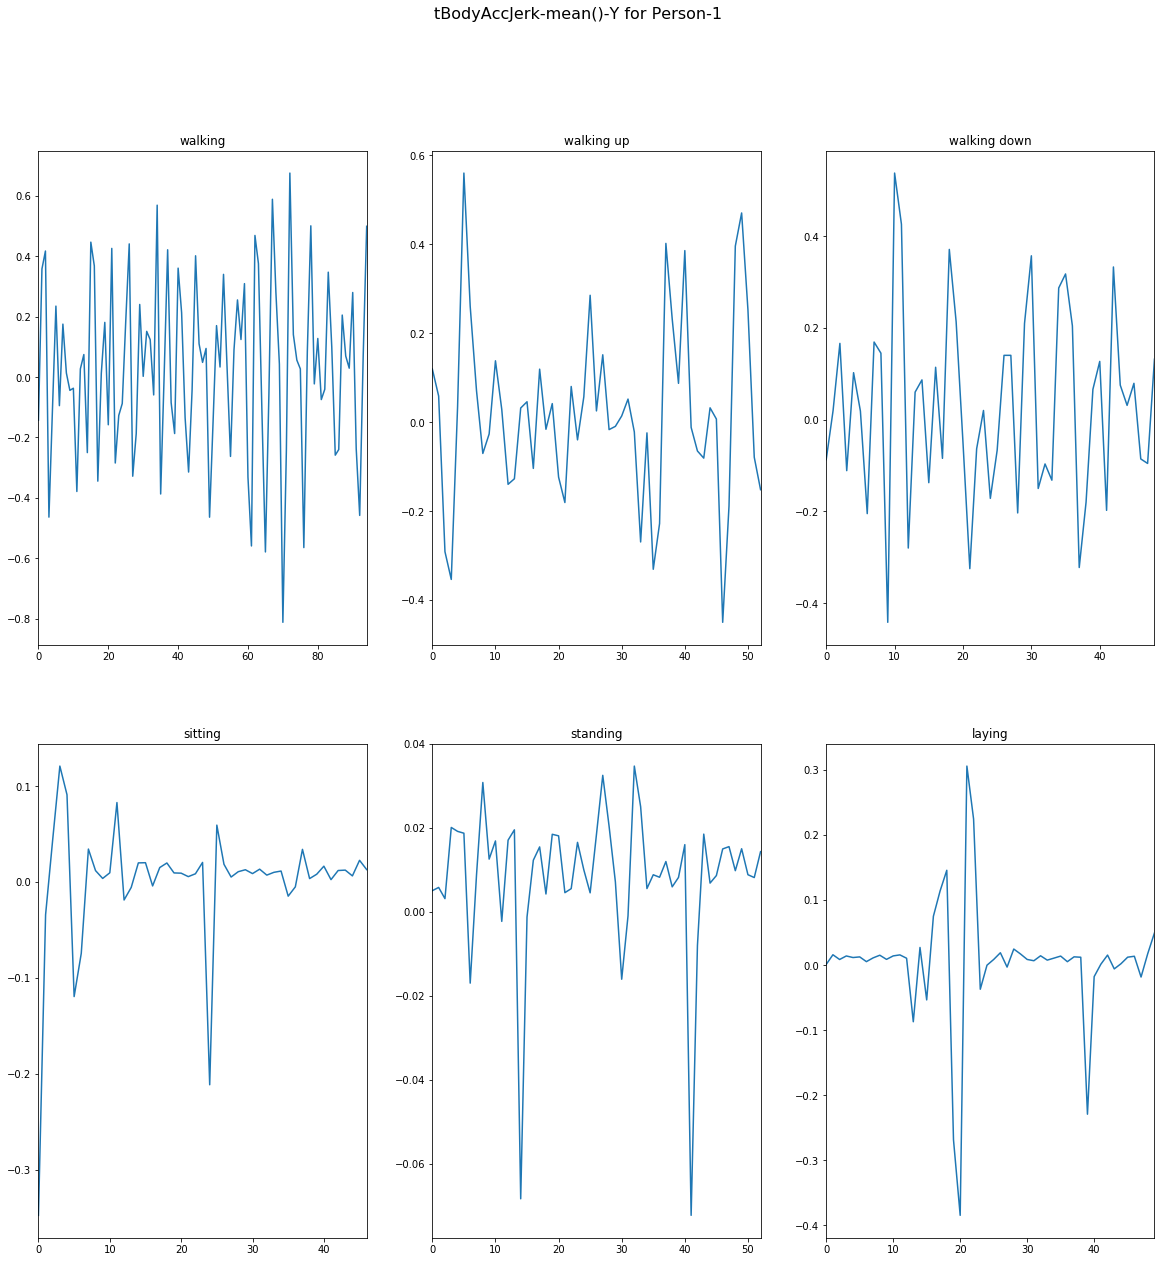

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,20))
fig.suptitle('tBodyAccJerk-mean()-Y for Person-1', fontsize=16)
ftr = 'tBodyAccJerk-mean()-Y'
a1 = walking_df[ftr].plot(ax=axes[0,0])
a1.set_title("walking")
a2 = walking_up_df[ftr].plot(ax=axes[0,1])
a2.set_title("walking up")
a3 = walking_down_df[ftr].plot(ax=axes[0,2])
a3.set_title("walking down")
a4 = sitting_df[ftr].plot(ax=axes[1,0])
a4.set_title("sitting")
a5 = standing_df[ftr].plot(ax=axes[1,1])
a5.set_title("standing")
a6 = laying_df[ftr].plot(ax=axes[1,2])
a6.set_title("laying")